In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

<h3> Pre Processing

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


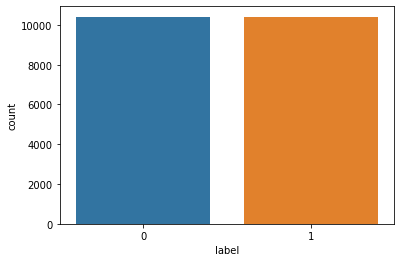

In [5]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

In [6]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [7]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [9]:
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


In [10]:
df_d= df.dropna()

In [11]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df=df_d

In [13]:
df = df.sample(frac = 1)

In [14]:
df.head(10)

,text,label
12181,agreed.,1
4434,Características de la nueva Nintendo Switch EL...,1
2992,"Continuing its business slump, a new review of...",0
2974,Former DEA Prescription Head Drops a BombShell...,1
772,On Thursday’s broadcast of the Fox News Channe...,0
13696,Archives Michael’s Latest Video What Is Causin...,1
9533,Clinton Campaign Questions Release Of FBI's Ma...,1
13857,"October 26, 2016 Another UNESCO vote to disreg...",1
10923,Señal de Alerta\nOSITRAN: PCM le baja el dedo ...,1
14195,It wasn’t until she was 3 years old that Shati...,0


In [15]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df.columns

Index(['text', 'label'], dtype='object')

In [17]:
df.head()

,text,label
0,agreed.,1
1,Características de la nueva Nintendo Switch EL...,1
2,"Continuing its business slump, a new review of...",0
3,Former DEA Prescription Head Drops a BombShell...,1
4,On Thursday’s broadcast of the Fox News Channe...,0


In [18]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [19]:
x

0                                                  agreed.
1        Características de la nueva Nintendo Switch EL...
2        Continuing its business slump, a new review of...
3        Former DEA Prescription Head Drops a BombShell...
4        On Thursday’s broadcast of the Fox News Channe...
                               ...                        
20756    Almost six years have passed since the death o...
20757    Thomas Pyle, President of the Institute for En...
20758    Donald Trump promises to pardon Snowden, Assan...
20759    Video: UK security agencies unlawfully collect...
20760    MARIETTA, Ga.  —   Jen Cox bit her tongue for ...
Name: text, Length: 20761, dtype: object

In [20]:
y

0        1
1        1
2        0
3        1
4        0
        ..
20756    1
20757    0
20758    1
20759    1
20760    0
Name: label, Length: 20761, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=100)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
pred_lr=LR.predict(xv_test)

In [28]:
LR.score(xv_test, y_test)

0.9409993979530403

In [29]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4135
           1       0.94      0.94      0.94      4170

    accuracy                           0.94      8305
   macro avg       0.94      0.94      0.94      8305
weighted avg       0.94      0.94      0.94      8305



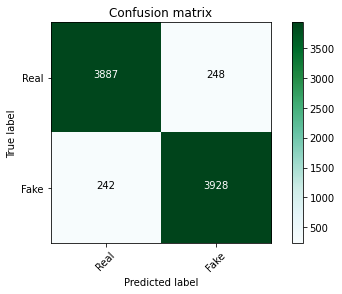

In [30]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.83


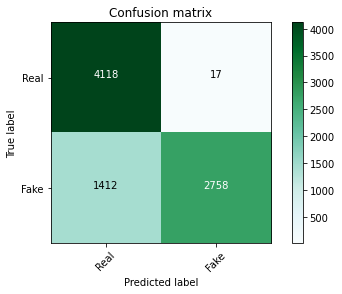

In [32]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4135
           1       0.99      0.66      0.79      4170

    accuracy                           0.83      8305
   macro avg       0.87      0.83      0.82      8305
weighted avg       0.87      0.83      0.82      8305



## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
pred_dt = DT.predict(xv_test)

In [37]:
DT.score(xv_test, y_test)

0.8795906080674293

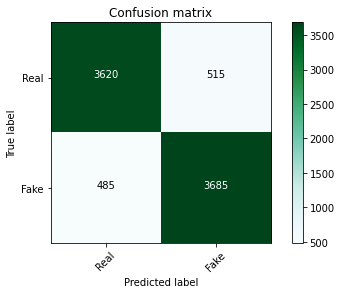

In [38]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [39]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4135
           1       0.88      0.88      0.88      4170

    accuracy                           0.88      8305
   macro avg       0.88      0.88      0.88      8305
weighted avg       0.88      0.88      0.88      8305



## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6593618302227574
              precision    recall  f1-score   support

           0       0.95      0.33      0.49      4135
           1       0.60      0.98      0.74      4170

    accuracy                           0.66      8305
   macro avg       0.77      0.66      0.62      8305
weighted avg       0.77      0.66      0.62      8305



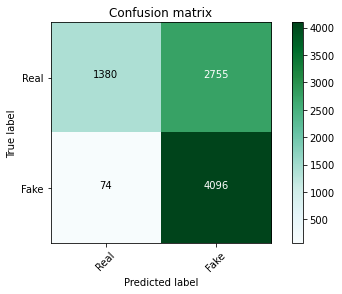

In [41]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [42]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.7112582781456953
              precision    recall  f1-score   support

           0       0.90      0.47      0.62      4135
           1       0.64      0.95      0.77      4170

    accuracy                           0.71      8305
   macro avg       0.77      0.71      0.69      8305
weighted avg       0.77      0.71      0.69      8305



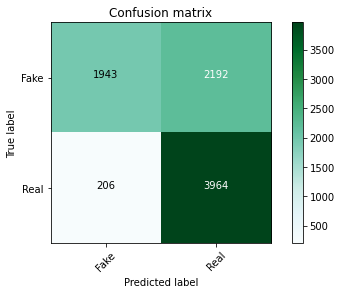

In [43]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(xv_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

<h3> Passive agressive Classifier 

In [45]:
y_pac=pac.predict(xv_test)

In [46]:
accuracy_score(y_test,y_pac)

0.9609873570138471